## Homework

In this homework, we will use Bank credit scoring dataset from [here](https://www.kaggle.com/datasets/kapturovalexander/bank-credit-scoring/data).

> **Note**: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.

> **Note**: we recommend using python 3.10 in this homework.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# import wget
# wget.download('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [9]:
df0 = pd.read_csv("bank.csv", sep=';')
df = df0.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
df.shape

(4521, 17)

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [13]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [14]:
df.describe(include = object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [15]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
numerical = df.drop(['y'], axis=1).select_dtypes('number').columns.to_list()

categorical = df.drop(['y'], axis=1).select_dtypes('object').columns.to_list()

In [18]:
print(numerical)
print()
print(categorical)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


**Make the "y" binary**

In [19]:
df.y = (df.y =="yes").astype(int)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [20]:
df.y.value_counts(dropna=False)

0    4000
1     521
Name: y, dtype: int64

**Split the data**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [23]:
len(df_full_train), len(df_test)

(3616, 905)

In [24]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [25]:
len(df_train), len(df_val), len(df_test)

(2712, 904, 905)

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,41,technician,married,secondary,no,0,no,no,cellular,11,mar,101,1,-1,0,unknown,0
1,38,self-employed,single,secondary,no,1146,yes,no,unknown,21,may,91,2,-1,0,unknown,0
2,41,blue-collar,married,primary,no,2067,yes,no,cellular,15,may,493,7,-1,0,unknown,0
3,36,management,married,tertiary,no,27359,yes,no,unknown,3,jun,71,2,-1,0,unknown,0
4,48,retired,married,primary,yes,-285,no,yes,cellular,19,nov,157,1,-1,0,unknown,0


In [28]:
df_val.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,45,services,married,secondary,no,0,no,yes,cellular,8,jul,47,7,-1,0,unknown,0
1,37,management,divorced,secondary,no,414,no,no,cellular,29,jan,293,2,162,4,failure,0
2,35,blue-collar,married,secondary,no,-339,yes,no,unknown,8,may,389,2,-1,0,unknown,0
3,48,management,married,secondary,no,4415,yes,no,cellular,8,apr,1032,3,141,7,failure,1
4,62,management,married,tertiary,no,1859,no,no,telephone,6,aug,245,3,-1,0,unknown,1


In [29]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,admin.,single,secondary,no,116,no,yes,cellular,16,jul,255,2,-1,0,unknown,0
1,46,blue-collar,married,primary,no,174,no,yes,cellular,15,jul,90,1,-1,0,unknown,0
2,50,blue-collar,married,secondary,no,372,yes,no,telephone,11,may,21,1,-1,0,unknown,0
3,45,management,married,tertiary,no,6945,no,no,cellular,5,aug,131,5,356,3,failure,0
4,49,blue-collar,married,secondary,no,579,yes,no,unknown,28,may,396,1,-1,0,unknown,0


In [30]:
y_train_ = df_train.y.values
y_val_ = df_val.y.values
y_test_ = df_test.y.values

In [31]:
len(y_train_), len(y_val_), len(y_test_)

(2712, 904, 905)

In [32]:
print(y_train_[:25])
print(y_val_[:25])
print(y_test_[:25])

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [33]:
del df_train["y"]
del df_val["y"]
del df_test["y"]

### ROC AUC feature importance

In [34]:
from sklearn.metrics import roc_auc_score

In [35]:
result = [(col, roc_auc_score(y_train_, df_train[col]) if roc_auc_score(y_train_, df_train[col]) >= 0.5 else roc_auc_score(y_train_, -df_train[col])) for col in numerical]
result_df = pd.DataFrame(result, columns=['Column', 'AUC'])
print((result_df.sort_values("AUC", ascending=False)))

     Column       AUC
3  duration  0.810920
6  previous  0.603340
5     pdays  0.594928
1   balance  0.589163
4  campaign  0.547806
0       age  0.527658
2       day  0.513778


### Training the model

**Apply one-hot-encoding using DictVectorizer**

In [36]:
from sklearn.feature_extraction import DictVectorizer

In [37]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
train_dict[0]

{'job': 'technician',
 'marital': 'married',
 'education': 'secondary',
 'default': 'no',
 'housing': 'no',
 'loan': 'no',
 'contact': 'cellular',
 'month': 'mar',
 'poutcome': 'unknown',
 'age': 41,
 'balance': 0,
 'day': 11,
 'duration': 101,
 'campaign': 1,
 'pdays': -1,
 'previous': 0}

In [38]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [39]:
X_train_ = dv.transform(train_dict)
X_train_

array([[4.1000e+01, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [3.8000e+01, 1.1460e+03, 2.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [4.1000e+01, 2.0670e+03, 7.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [4.3000e+01, 1.3044e+04, 4.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [4.9000e+01, 1.1140e+03, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [5.8000e+01, 4.9700e+02, 5.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [40]:
X_train_.shape

(2712, 51)

In [41]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'default=no',
       'default=yes', 'duration', 'education=primary',
       'education=secondary', 'education=tertiary', 'education=unknown',
       'housing=no', 'housing=yes', 'job=admin.', 'job=blue-collar',
       'job=entrepreneur', 'job=housemaid', 'job=management',
       'job=retired', 'job=self-employed', 'job=services', 'job=student',
       'job=technician', 'job=unemployed', 'job=unknown', 'loan=no',
       'loan=yes', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [42]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val_ = dv.transform(val_dict)
X_val_

array([[ 4.500e+01,  0.000e+00,  7.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 3.700e+01,  4.140e+02,  2.000e+00, ...,  0.000e+00,  0.000e+00,
         4.000e+00],
       [ 3.500e+01, -3.390e+02,  2.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       ...,
       [ 3.400e+01,  4.100e+01,  9.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 4.200e+01,  7.702e+03,  2.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 5.900e+01,  0.000e+00,  2.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00]])

**Train the Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train_, y_train_)

LogisticRegression(max_iter=1000, solver='liblinear')

In [45]:
model.intercept_[0]

-0.8140857758856016

In [46]:
model.coef_[0].round(3)

array([-0.000e+00,  0.000e+00, -5.200e-02,  1.930e-01,  4.300e-02,
       -1.050e+00,  1.700e-02, -7.310e-01, -8.300e-02,  4.000e-03,
       -2.110e-01, -1.750e-01,  2.090e-01, -6.380e-01, -2.050e-01,
       -6.100e-01, -3.600e-02, -2.490e-01, -6.610e-01, -4.390e-01,
       -2.130e-01,  6.490e-01, -2.040e-01,  2.100e-01,  6.240e-01,
       -1.440e-01, -4.200e-01,  6.900e-02, -9.500e-02, -7.200e-01,
        2.100e-02, -4.730e-01, -3.620e-01, -2.680e-01, -4.390e-01,
        2.730e-01,  2.830e-01, -9.980e-01, -7.330e-01,  2.420e-01,
        1.059e+00, -5.070e-01, -8.770e-01,  9.700e-01,  1.810e-01,
        1.000e-03, -9.460e-01, -4.240e-01,  1.471e+00, -9.150e-01,
        1.100e-02])

In [47]:
pd.options.display.float_format = '{:.3f}'.format

y_pred = model.predict_proba(X_val_)[:, 1]
y_pred

array([1.21771428e-02, 1.05826419e-01, 1.99595834e-02, 6.59134294e-01,
       7.04275418e-02, 1.55477630e-01, 7.10393483e-03, 2.86609621e-01,
       1.68224461e-02, 2.47373265e-01, 1.52994523e-02, 2.75917131e-01,
       1.07369311e-01, 4.97599842e-01, 4.66950410e-02, 1.70466275e-01,
       7.45735099e-02, 2.86730187e-02, 2.47537472e-01, 1.63221889e-02,
       5.33564446e-02, 8.51073297e-02, 5.22051894e-02, 7.55056810e-02,
       4.10154384e-02, 6.68193742e-02, 1.34529130e-01, 1.35000630e-02,
       7.98853682e-02, 1.88900318e-01, 9.30875489e-03, 9.56799309e-03,
       6.45090921e-03, 4.62183242e-02, 1.33931094e-01, 4.86267937e-02,
       1.08552338e-02, 2.56508790e-02, 1.64036182e-02, 8.19716076e-03,
       1.19671371e-02, 1.31944591e-01, 1.59599796e-02, 7.73017350e-02,
       7.71708470e-01, 6.25938027e-02, 7.71750614e-03, 1.26390367e-02,
       7.08850261e-02, 1.42974955e-02, 1.31034504e-01, 2.29904795e-02,
       4.11665831e-02, 1.76100633e-02, 1.85449980e-02, 1.94337339e-02,
      

In [48]:
from sklearn.metrics import roc_auc_score

score_roc_auc = round(roc_auc_score(y_val_, y_pred), 3)
print("roc_auc_score -->", score_roc_auc)

roc_auc_score --> 0.913


### Precision and Recall

**Compute precision and recall**

In [49]:
from sklearn.metrics import precision_score, recall_score

In [50]:
thresholds = np.arange(0.0, 1.0, 0.01)

score_pre_rec = []

for t in thresholds:
    score_precision = precision_score(y_val_, y_pred >= t)
    score_recall = recall_score(y_val_, y_pred >= t)
    score_pre_rec.append({score_precision, score_recall})

In [51]:
scores = pd.DataFrame(score_pre_rec, columns = ["Precision", "Recall"])
scores["Threshold"] = thresholds

last_column = scores.pop('Threshold')
scores.insert(0, 'Threshold', last_column)

scores.sort_values("Threshold")

,Threshold,Precision,Recall
0,0.000,0.102,1.000
1,0.010,0.112,1.000
2,0.020,0.134,0.989
3,0.030,0.160,0.978
4,0.040,0.189,0.967
...,...,...,...
95,0.950,0.700,0.076
96,0.960,0.750,0.065
97,0.970,0.750,0.065
98,0.980,0.667,0.043


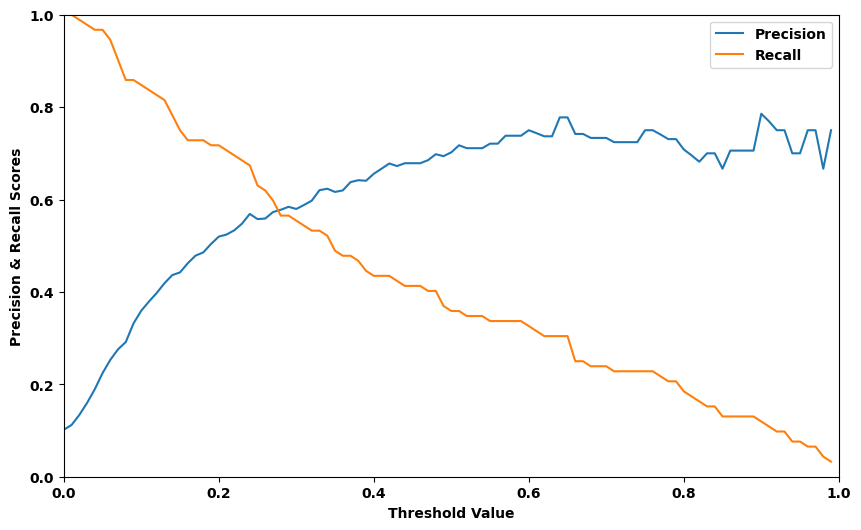

In [52]:
plt.figure(figsize=(10,6))

plt.plot(scores.Threshold, scores.Precision)
plt.plot(scores.Threshold, scores.Recall)
plt.legend(["Precision", "Recall"])
plt.xlabel("Threshold Value")
plt.ylabel("Precision & Recall Scores")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### F1 score

In [53]:
scores["f1_manual"] = 2 * scores.Precision * scores.Recall / (scores.Precision + scores.Recall)
scores

,Threshold,Precision,Recall,f1_manual
0,0.000,0.102,1.000,0.185
1,0.010,0.112,1.000,0.201
2,0.020,0.134,0.989,0.235
3,0.030,0.160,0.978,0.274
4,0.040,0.189,0.967,0.317
...,...,...,...,...
95,0.950,0.700,0.076,0.137
96,0.960,0.750,0.065,0.120
97,0.970,0.750,0.065,0.120
98,0.980,0.667,0.043,0.082


In [54]:
from sklearn.metrics import f1_score

In [55]:
thresholds = np.arange(0.0, 1.0, 0.01)

f1_sklearn = []

for t in thresholds:
    score_f1 = f1_score(y_val_, y_pred >= t)
    f1_sklearn.append(score_f1)
    
scores["f1_sklearn"] = f1_sklearn
scores

,Threshold,Precision,Recall,f1_manual,f1_sklearn
0,0.000,0.102,1.000,0.185,0.185
1,0.010,0.112,1.000,0.201,0.201
2,0.020,0.134,0.989,0.235,0.235
3,0.030,0.160,0.978,0.274,0.274
4,0.040,0.189,0.967,0.317,0.317
...,...,...,...,...,...
95,0.950,0.700,0.076,0.137,0.137
96,0.960,0.750,0.065,0.120,0.120
97,0.970,0.750,0.065,0.120,0.120
98,0.980,0.667,0.043,0.082,0.082


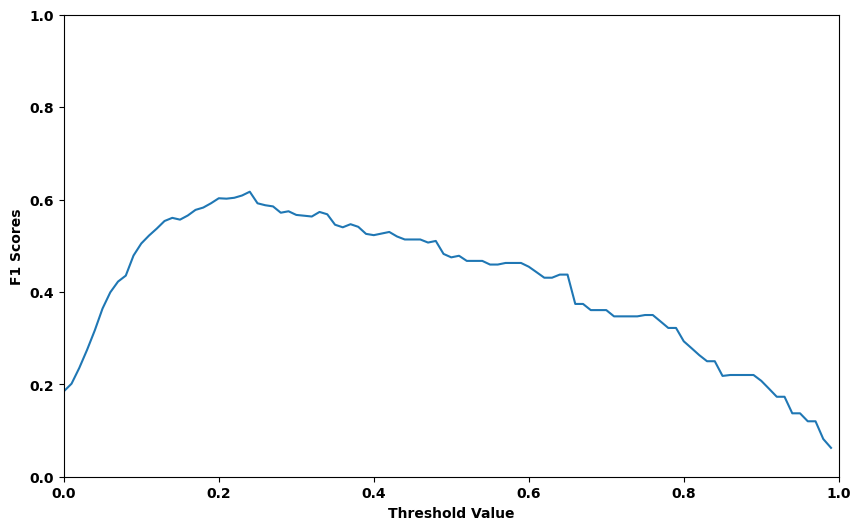

In [56]:
plt.figure(figsize=(10,6))

plt.plot(scores.Threshold, scores.f1_manual)
plt.xlabel("Threshold Value")
plt.ylabel("F1 Scores")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [57]:
scores.loc[scores['f1_manual'].idxmax()]

Threshold    0.240
Precision    0.569
Recall       0.674
f1_manual    0.617
f1_sklearn   0.617
Name: 24, dtype: float64

In [58]:
scores.sort_values("f1_manual", ascending=False).head(1)

,Threshold,Precision,Recall,f1_manual,f1_sklearn
24,0.240,0.569,0.674,0.617,0.617


In [59]:
scores.sort_values("f1_sklearn", ascending=False).head(1)

,Threshold,Precision,Recall,f1_manual,f1_sklearn
24,0.240,0.569,0.674,0.617,0.617


### 5-Fold CV

In [60]:
from sklearn.model_selection import KFold

In [61]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', max_iter=1000, C=C)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [62]:
columns = numerical + categorical

scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train["y"]
    y_val = df_val["y"]
    
    del df_train["y"]
    del df_val["y"]

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.895 +- 0.017


In [63]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
model_cv = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
cv_results = cross_val_score(model_cv, X_train_, y_train_, cv = kfold, scoring = "roc_auc")
round(np.std(cv_results),3)

0.023

### Hyperparemeter Tuning

In [64]:
# !pip install tqdm

In [65]:
from tqdm.auto import tqdm

In [66]:
n_splits = 5

for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train["y"].values
        y_val = df_val["y"].values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.857 +- 0.022
C=0.1 0.896 +- 0.018
C=0.5 0.895 +- 0.016
C=10 0.893 +- 0.016


In [67]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(solver='liblinear', max_iter=1000, C=C)

C = [0.01, 0.1, 0.5, 10] 

param_grid = {"C" : C}

cv = StratifiedKFold(n_splits = 5)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "roc_auc",
                          n_jobs = -1,
                          return_train_score=True)

grid_model.fit(X_train_, y_train_)

print(grid_model.best_estimator_)
print("-"*25)
print(pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]])

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')
-------------------------
mean_test_score    0.884
mean_train_score   0.900
Name: 1, dtype: object


In [69]:
C=0.1

dv, model = train(df_full_train, df_full_train.y.values, C=C)
y_pred = predict(df_test, dv, model)

# y_test = df_test["y"].values
auc = roc_auc_score(y_test_, y_pred)
auc

0.8697743533296644

**Save the model**

In [70]:
import pickle

In [71]:
output_file = f'model_C={C}.bin'
output_file

'model_C=0.1.bin'

In [72]:
f_out = open(output_file, 'wb')
pickle.dump((dv, model), f_out)
f_out.close()

In [73]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

**Load the model**

In [74]:
import pickle

In [75]:
with open(output_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [76]:
dv, model

(DictVectorizer(sparse=False),
 LogisticRegression(C=0.1, max_iter=1000, solver='liblinear'))

In [77]:
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3667,30,management,single,tertiary,yes,35,no,no,cellular,30,jul,185,4,-1,0,unknown,0
2610,31,entrepreneur,married,tertiary,no,5191,no,no,cellular,20,nov,187,2,-1,0,unknown,0
4490,58,admin.,married,secondary,no,3496,yes,no,unknown,2,jun,111,4,-1,0,unknown,0


In [78]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [95]:
customer = {'age' : 41, 
            'job' : 'management', 
            'marital' : 'single', 
            'education' : 'unknown', 
            'default' : 'no', 
            'balance' : 1422, 
            'housing' : 'yes',
            'loan' : 'no', 
            'contact' : 'unknown', 
            'day' : 22, 
            'month' : 'nov', 
            'duration' : 278, 
            'campaign' : 4, 
            'pdays' : 43,
            'previous' : 3, 
            'poutcome' : 'failure'}

In [97]:
X = dv.transform([customer])

In [99]:
model.predict_proba(X)[0,1]

0.03476902816099536

## Question 1

* Install Pipenv
* What's the version of pipenv you installed?
* Use `--version` to find out

In [62]:
! pip install pipenv -q

In [63]:
! pipenv --version

pipenv, version 2023.10.3


## Question 2

* Use Pipenv to install Scikit-Learn version 1.3.1
* What's the first hash for scikit-learn you get in Pipfile.lock?

> **Note**: you should create an empty folder for homework
and do it there.

In [69]:
! pipenv install scikit-learn==1.3.1

Installing scikit-learn==1.3.1...
Resolving scikit-learn==1.3.1...
[    ] Installing...
Added scikit-learn to Pipfile's [packages] ...
[    ] Installing scikit-learn...
Installation Succeeded
[    ] Installing scikit-learn...
[    ] Installing scikit-learn...

Building requirements...
[    ] Locking...
Resolving dependencies...
[    ] Locking...
[=   ] Locking...
[==  ] Locking...
[=== ] Locking...
[ ===] Locking...
[  ==] Locking...
[    ] Locking...
[   =] Locking...
[  ==] Locking...
[ ===] Locking...
[====] Locking...
[=== ] Locking...
[=   ] Locking...
[    ] Locking...
[=   ] Locking...
[==  ] Locking...
[=== ] Locking...
[ ===] Locking...
[   =] Locking...
[    ] Locking...
[   =] Locking...
[  ==] Locking...
[ ===] Locking...
[====] Locking...
[=== ] Locking...
[==  ] Locking...
[=   ] Locking...
[    ] Locking...
[=   ] Locking...
[=== ] Locking...
[ ===] Locking...
[  ==] Locking...
[   =] Locking...
[    ] Locking...
[   =] Locking...
[ ===] Locking...
[====] Locking...
[===

Pipfile.lock not found, creating...
Locking [packages] dependencies...
False
CRITICAL:pipenv.patched.pip._internal.resolution.resolvelib.factory:Could not find a version that satisfies the requirement scikit-learn==1.3.1 (from versions: none)
[ResolutionFailure]:   File "C:\Users\Toshiba\anaconda3\lib\site-packages\pipenv\resolver.py", line 645, in _main
[ResolutionFailure]:       resolve_packages(
[ResolutionFailure]:   File "C:\Users\Toshiba\anaconda3\lib\site-packages\pipenv\resolver.py", line 612, in resolve_packages
[ResolutionFailure]:       results, resolver = resolve(
[ResolutionFailure]:   File "C:\Users\Toshiba\anaconda3\lib\site-packages\pipenv\resolver.py", line 592, in resolve
[ResolutionFailure]:       return resolve_deps(
[ResolutionFailure]:   File "C:\Users\Toshiba\anaconda3\lib\site-packages\pipenv\utils\resolver.py", line 892, in resolve_deps
[ResolutionFailure]:       results, hashes, internal_resolver = actually_resolve_deps(
[ResolutionFailure]:   File "C:\Users\T